# 심층 신경망

## 2개 이상의 층
- 층을 늘려보자
- 입력층과 출력층 사이에 밀집층을 추가
    - 입력층과 출력층 사이에 있는 모든 층을 **은닉층**이라고 함
        - 은닉층에도 활성화 함수가 들어가 있음(활성화함수 : 신경만 층의 선형방정식의 계산값에 적용하는 함수)
        - 출력층에는 활성화 함수가 제한되어 있음(이진분류:시그모이드, 다중분류:소프트맥스)
        - 은닉층에서는 비교적 자유롭게 활성화 함수를 사용할 수 있음
        - tip.분류문제에서는 확률을 계산하기위해 활성화 함수를 써야하지만 회귀문제의 출력은 임의의 어떤 값이므로 선형방정식의 계산을 그래도 출력하므로 활성화함수를 지정하지 않는다.
        - 히든층의 뉴런은 출력층의 뉴런 수보다 많게 설정한다.
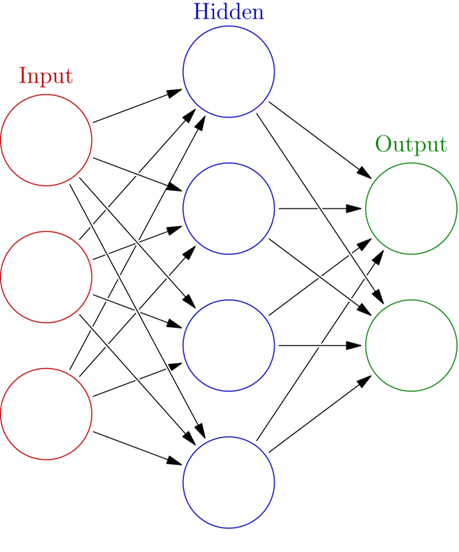
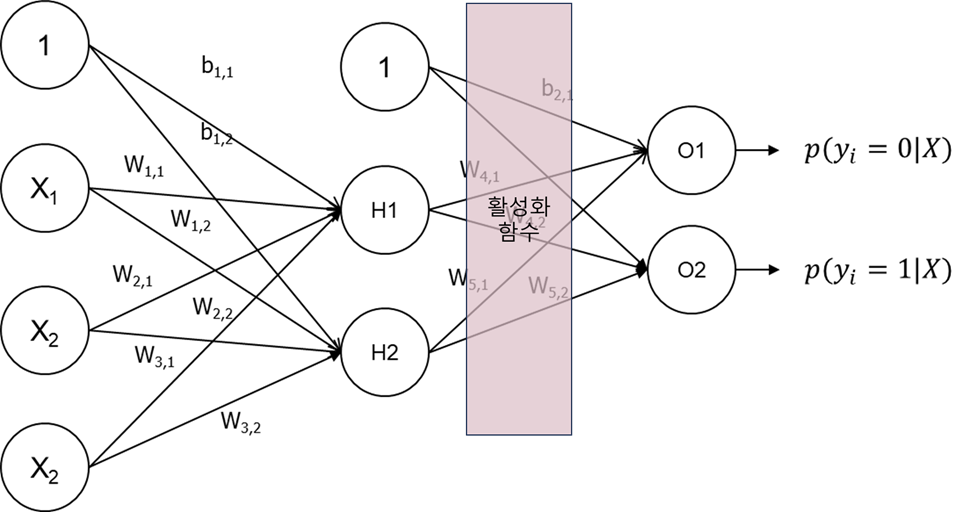

### 은닉층에 활성화 함수를 적용하는 이유?
- 아래 예시 방정식을 살펴보면
- 왼쪽의 첫번째 식에서 계산된 b가 두번째 식에서 c를 계산하기 위해 쓰였음
    - 그러나 두번째 식에 첫번째 식을 대입하면 하나의 식으로 합쳐질 수 있음
    - b는 사라짐:b가 하는일이 없는 셈이 됨
    -  a X 3 + 2 = b
    -  b X 5 - 3 = c
        - (a X 3 + 2) X 5 -3 = c 


### 많이 사용하는 활성화 함수
- 시그모이드 함수 : 뉴런의 출력 z 값을 0과 1로 압축하는 역할을 함
- ReLu 함수 

In [1]:
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(train_input, train_target), (test_input, test_target) = (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 2차원 이미지를 1차원으로 변형
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# val 데이터셋 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 48000]

In [7]:
## 밀집층 생성
## 시그모이드 함수를 활성화 함수로 사용하는 은닉층
## 소프트맥스 함수를 활성화 함수로 사용하는 출력층
## 첫번째 층은 unit을 100개 갖고 있는 층이고 활성화함수로 sigmoid를 사용
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)) # 은닉층
dense2 = keras.layers.Dense(10, activation = 'softmax')

- dense1은 은닉층이고 100개의 뉴런을 가진 밀집층
    - 은닉층의 뉴런 개수를 정하는데는 특별한 기준은 없음. 몇개의 뉴런을 두어야 할지는 상당히 많은 경험을 필요로 함
        - 데이터의 속성, 크기등 데이터에 따라 달라지기 때문에 하이퍼파라미터로 사용하고 여러 경우를 적용시켜야 함
        - 단, 적어도 출력층보다는 많게 만들어야 한다. 클래스 10개에 대한 확률을 예측하는데 은닉층이 10보다 작으면 적은 정보를 전달하게 됨. 
        - 현재 은닉층의 출력이 다음 층의 입력이 된다는 사실을 명심해야 하고,
            - 예제에 대입시키면 784개의 입력이 100개의 출력이 되는 것 이므로 데이터가 상당히 압축(특성추출)된다고 봐야 함

## 심층 신경망 만들기
- 여러개의 층을 추가하려면 리스트로 만들어서 전달, 다만 출력층을 가장 마지막에 두어야 함
- **처음 은닉층부터 마지막 출력층까지 순서대로 나열**해야 한다
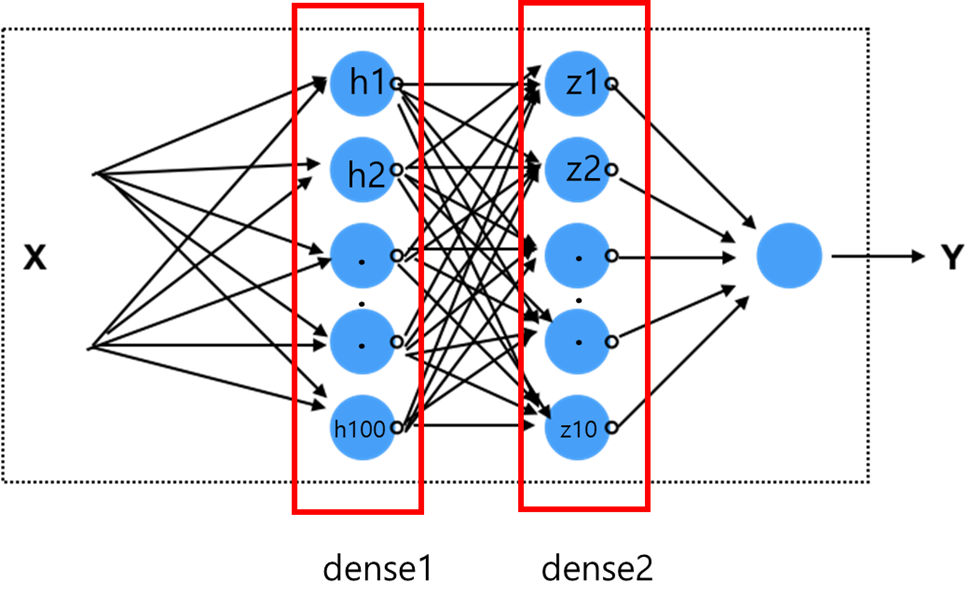
- 인공신경망의 강력한 성능은 층을추가하여 입력데이터에 대해 연속적인 학습을 진행하는 능력에서 나옴
    - **2개 이상의 층을 추가할 수 있으며 몇개의 층을 추가할건지는 사이언티스트의 결정**에 달림

### 구성한 모델 모양을 연결하기
- Sequential([층1, 층2])

In [8]:
model = keras.Sequential([dense1, dense2])

In [9]:
# 모델의 설명 정보
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 출력 크기 : Output Shape
    - 첫번째 차원은 샘플 개수이며 샘플개수가 아직 정해져 있지 않으므로 None
        - fit()메서드에 훈련데이터를 추가하면 한번에 모두 사용하지 않고 잘게 나누어 여러번에 걸쳐 경사하강법을 수행함(미니배치 경사하강법)
        - 케라스의 기본 미니배치 크기는 32개이며, fit()메서드에서 변경 가능 함
        - 샘플크기를 고정하지 않고 어떤 크기에도 유연하게 반응하기 위해 None로 설정
        - 배치 차원 이라고 함
    - 두번째 차원은 출력크기 : 이 예제에서는 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축됨
- 모델 파라미터 : Param #
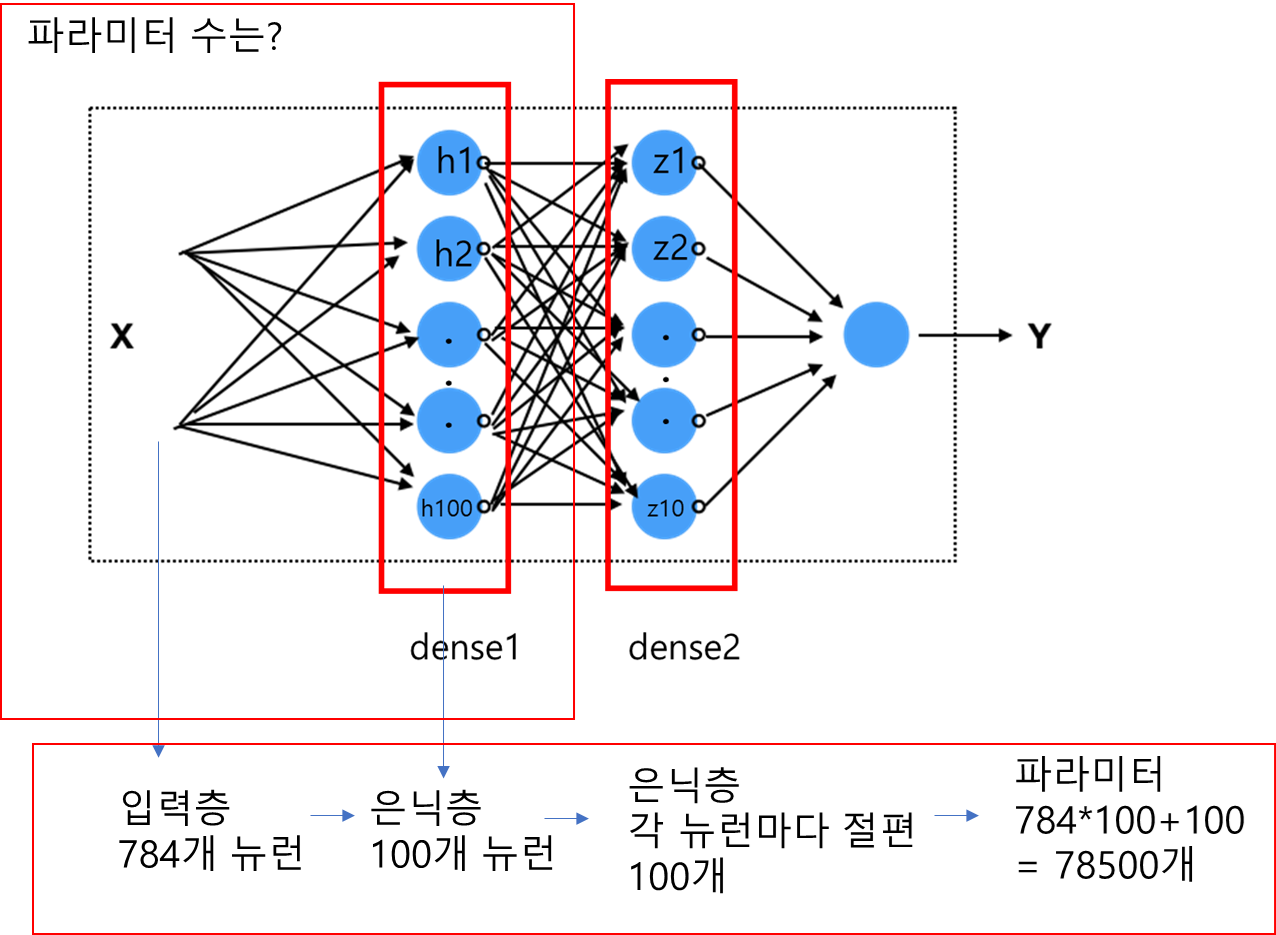
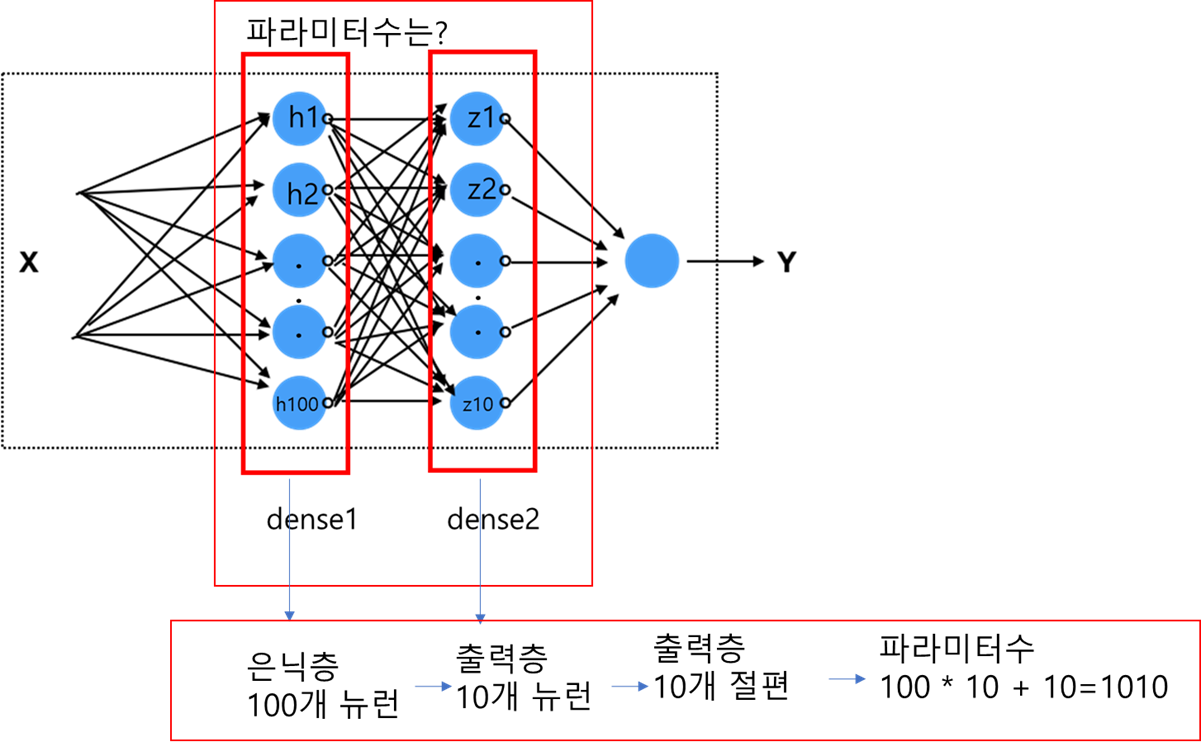
- 간혹 경사하강법으로 훈련되지 않는 파라미터가 있을 수 있음 : 규제적용 시(drop out) 

## 층을 추가하는 다른 방법

In [10]:
#방법1.  Sequential()에 리스트로 층을 전달, 각 층마다 이름을 부여할 수 있음)
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden'), # 은닉층
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#방법2. Sequential()객체를 만들고 add()함수를 이용해 층을 추가할 수도 있음
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name = 'hidden')) # 은닉층
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 모델 설정 및 학습
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 48000
Make sure all arrays contain the same number of samples.

In [15]:
# 검증세트로 모델의 성능을 확인(성능평가 : evaluate())
model.evaluate(val_scaled, val_target)
# 훈련세트보다 조금 낮아짐

375/375 [==============================] - 0s 761us/step - loss: 0.1325 - accuracy: 0.9596


[0.13254214823246002, 0.9595833420753479]

- 추가된 층이 성능을 향상시켰음
-  0.9213 -> 0.9596

## 렐루 활성화 함수

- 시그모이드 함수(초창기 인공신경망에 가장 많이 사용됨)
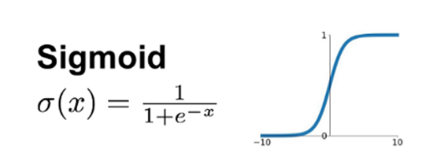
- 오른쪽 끝과 왼쪽 끝으로 갈수록 그래프가 누워 있기 때문에 올바른 출력에 신속하게 대응하지 못함(출력 계산이 복잡해 짐)
    - 층이 많은 신경망 일수록 누적되어 학습을 어렵게 했고 개선하기 위한 다른 종류의 활성화 함수가 제안됨 => 렐루함수


- 렐루함수
    - 입력이 양수일 경우 활성화 함수가 없는것처럼 그냥 통과시키고 
    - 음수일경우에 0을 만들어버림
    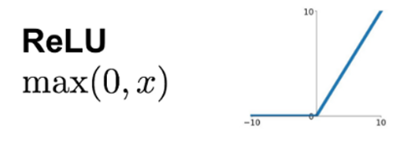
    - max(0,Z) : Z가 0보다 크면 Z를, 작으면 0을 출력
    - 이미지 처리에 좋은 성능을 낸다고 알려져 있음(이미지의 크기가 크고 차원이 많은 이미지(명도, RGB, alpha값등이 포함되어져 있는 이미지. png이미지)

### flatten 층
- 이미지를 1차원으로 처리하기 위해 reshape 함수를 써서 직접 1차원으로 변경
- 케라스는 직접 1차원으로 변경하도록 층을 하나 제공하는데 그 층이 Flatten 층임(Flatten 클래스)
- Flatten 클래스는 배치 차원을 제외하고 나머지 입력차원을 모두 일렬로 펼치는 역할을 하며
    - 입력층으로 추가해야 함(즉, input_shape을 flatten 층이 갖고 있어야 함)

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28))) # 2차원 -> 1차원, 입력층
model.add(keras.layers.Dense(100, activation = 'relu')) # 은닉층
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [19]:
# 케라스 API는 입력 데이터에 대한 전처리 과정을 될 수 있으면 모델에 포함시킴
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 1차원으로 재배치를 진행하지 않음(flatten 층을 추가했으므로)
(train_input, train_target), (test_input, test_target) = (x_train, y_train), (x_test, y_test) = mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
# 모델 설정 및 학습
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.9157
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1446 - accuracy: 0.9586
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1059 - accuracy: 0.9691
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9751
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0697 - accuracy: 0.9800


In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9732


[0.09601845592260361, 0.9731666445732117]

- 0.9596 -> 0.9698
- relu 함수 적용 후 학습데이터에 대해서는 아주 약간 성능향상이 있음, 검증시 성능이 떨어졌지만 적용 전 보다는 올라감

## 옵티마이저
- 신경망은 하이퍼파라미터가 많음
    - 지금까지 하이퍼파라미터
        - 은닉층의 개수, 뉴런 개수, 활성화 함수, 층의 종류, 배치 사이즈 매개변수, 에포크 매개변수
        - model 컴파일 시 배치를 위한 optimizer를 하이퍼 파라미터로 제공함
            - 기본 배치를 위한 optimizer는 RMSprop 방식의 경사하강법임
        - 즉 옵티마이저함수는 하이퍼파라미터 배치나 조정을 가장 적절하게 바꿔주는 역할을 한다
            - 배치사이즈, 학습률등을 분석가가 설정한데로 진행하다가 옵티마이저 함수는 학습의 마지막쯤에서 자동으로 배치사이즈나 학습률등을 조정하는 역할
        - 학습데이터의 실제결과와 모델의 예측 결과를 기반으로 차이를 잘 줄일수 있도록 만들어 주는 역할(힌트를 잘 전달)
        - 손실함수가 최저 손실값을 찾아가도록 하는 것이 최적화 함수(Optimization)
        - 네비로 생각하면 길을 일단 운전자가 원하는 방향으로 안내하지만 그 길말고 다른 추천길도 제공하는 것 처럼 옵티마이저역시 일단 분석가가 구성한 하이퍼파라미터로 진행하지만 배치나 구성을 약간씩 변경하여 다른 방법도 시도해보게 되고 그것이 더 좋은 방법이라면 옵티마이저가 찾은 배치를 사용하게 된다

In [25]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [27]:
# optmizers 객체를 이용할 수 도 있음
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [29]:
# 학습률 조정도 가능함
sgd = keras.optimizers.SGD(learning_rate = 0.1)

- SGD (Stochastic Gradient Descent) : 미분 가능한 함수에서 기울기(gradient)를 계산하여 가중치를 업데이트
    - Momentum 파라미터 : 가중치를 수정하기전 이전 수정 방향(+,-)를 참고하여 같은 방향으로 일정한 비율만 수정되게 하는 방법
    - 수정이 양(+) 방향, 음(-) 방향 순차적으로 일어나는 지그재그 현상이 줄어들고, 이전 이전 값을 고려해여 일정 비율만큼 다음 값을 결정
- RMSprop (Root Mean Square Propagation): SGD의 단점 중 하나인 학습률을 설정하기 어려운 문제를 해결하기 위해 고안된 알고리즘. 기울기 제곱의 이동평균 값을 구하여 학습률을 조절
- Adam (Adaptive Moment Estimation): RMSprop과 모멘텀을 결합하여 만든 최적화 알고리즘. 기울기 제곱과 모멘텀의 이동평균 값을 계산하여 학습률을 조절
- AdaGrad (Adaptive Gradient) : AdaGrad는 Feature별로 학습률(Learning rate)을 Adaptive하게, 즉 다르게 조절하는 것이 특징

In [30]:
sgd = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
# 학습률은 SGD가 설정한 0.1로 고정 최적의 회귀계수를 찾기위해 반복을 진행
# 데이터 양이 충분하지 않으면 과적합 발생 가능성이 높음
# nesterov=True 규제를 할수도 있음
# momentum : SGD 미분시 적절한 방향으로 진행하게 하고 곡점을 줄여주는 매개변수.

In [31]:
adagrad = keras.optimizers.Adagrad()

In [32]:
rmsprop = keras.optimizers.RMSprop()

In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [34]:
# adam 으로 옵티마이저 후 학습
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

In [35]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3003 - accuracy: 0.9153
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1401 - accuracy: 0.9591
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0972 - accuracy: 0.9717
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9779
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9820


In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 834us/step - loss: 0.0985 - accuracy: 0.9705


[0.0984654575586319, 0.9704999923706055]

- 0.9698->0.9704
- 옵티마이저 변경 후 약간의 성능향상
- 반드시 이렇게 나오지는 않음 약간의 차이가 있을 수 있다. 랜덤방식이 적용되기 때문임

**옵티마이저 함수는 SGD, Adam을 많이 사용함**

In [ ]:
keras.datasets.fahion_mnist.load_data()
이미지를 다운 받아서
인공신경망 모델생성 - 성능측정 - 에포크 수정 (성능 확인)
시믕신경망 모델생성 - 성능측정 - 에포크 수정 (성능 확인)
딥러닝연습_패션mnist.ipynb